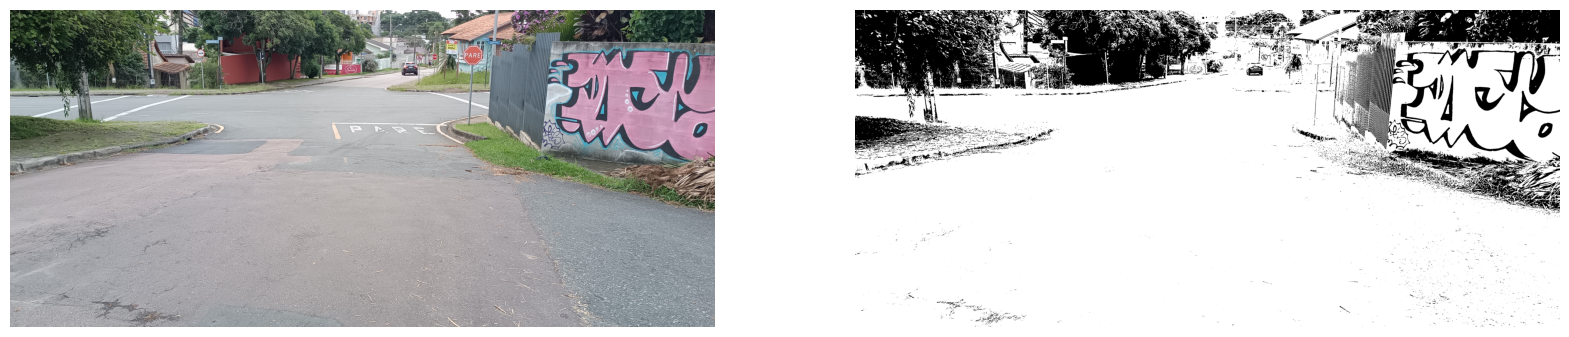

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem original
image = cv2.imread('roads/IMG_20240218_095419.jpg')

# Segmentação para identificar a região da estrada com asfalto (exemplo de limiarização)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, asphalt_mask = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)  # Exemplo de limiarização, ajuste conforme necessário

# Aplicar a máscara na imagem original
asphalt_region = cv2.bitwise_and(image, image, mask=asphalt_mask)

# Criar uma nova imagem usando a região isolada da estrada com asfalto
new_image = np.zeros_like(image)
new_image[np.where((asphalt_region > [0, 0, 0]).all(axis=2))] = [255, 255, 255]  # Preencher a região com asfalto com branco

plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)  
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)  
plt.imshow(new_image)
plt.axis('off')

plt.show()